# Shell Scripting/Data Gathering

In [2]:
# imports
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [21]:
# cuda script runner
def scriptRunner(n):
    cmd = f"echo " + str(n) + " | ./vectoradd"
    res = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    
    data = res.stdout.split('\n')[0:2]

    return [n, [int(n) for n in data]]

In [22]:
# Generate Data
maxN = 500000
granularity = 10
nums = [n * (maxN // granularity) for n in range(granularity, 0, -1)]

data = []

for n in nums:
    data.append(scriptRunner(n))

print(data)

[[500000, [737, 171]], [450000, [641, 164]], [400000, [588, 145]], [350000, [499, 149]], [300000, [441, 147]], [250000, [368, 146]], [200000, [301, 134]], [150000, [220, 137]], [100000, [147, 129]], [50000, [73, 132]]]


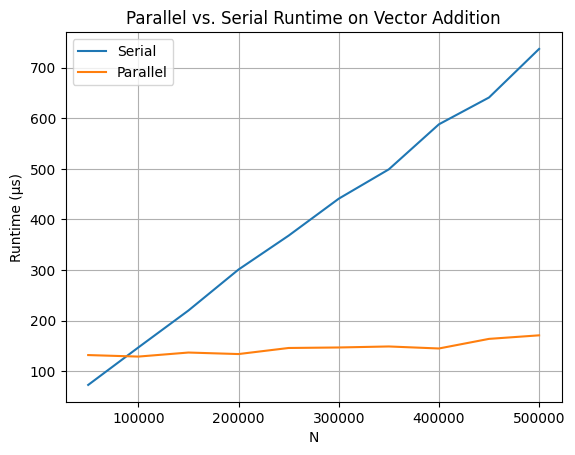

In [23]:
# Plot Data

x = [l[0] for l in data]
y = [l[1] for l in data]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='N', ylabel='Runtime (μs)',
       title='Parallel vs. Serial Runtime on Vector Addition')
ax.grid()

plt.legend(["Serial", "Parallel"])

fig.savefig("runtime_plot_after_block_implementation.png")
plt.show()